# Analysis

## Set-up data for the experiments

In [2]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


In [35]:
import numpy as np


for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
    sampledDataMatrix = datamatrixDf[datamatrixDf.visit_occurrence_id.isin(np.random.choice(datamatrixDf.visit_occurrence_id.unique(), size=sample, replace=False))]
    sampledDataMatrix.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_' + str(sample) + '.csv', index=False)
    print(sampledDataMatrix.shape, len(sampledDataMatrix.visit_occurrence_id.unique()))

(1067, 125) 200
(1516, 125) 300
(2105, 125) 400
(2409, 125) 500
(3015, 125) 600
(3518, 125) 700
(3922, 125) 800
(4753, 125) 900
(4885, 125) 1000
(9872, 125) 2000
(15298, 125) 3000
(20800, 125) 4000
(25430, 125) 5000
(30272, 125) 6000
(35215, 125) 7000
(40705, 125) 8000
(45383, 125) 9000
(50512, 125) 10000
(56237, 125) 11146


## Run the analysis

In [4]:
import os


for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
        print('Sample Size: ' + str(sample))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_''' + str(sample) + '''.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(2) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/results/wb_0_wa_2_sample_''' + str(sample) + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

### Define data directory

In [1]:
import os

dataDirName = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/results'''

### Load results in a DataFrame

In [2]:
import json
from pathlib import Path
import pandas as pd


data = []

for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [11146]:
    for windowAfter in [3]:
        scoresFile = Path(dataDirName, '''wb_0_wa_''' + str(windowAfter) + '''_sample_''' + str(sample) + '''.json''')
        if os.path.exists(scoresFile):
            with open(Path(scoresFile), 'rb') as f:
                aurocs = json.load(f)['test_roc_auc']
                for auroc in aurocs:
                    data.append(['0-' + str(windowAfter) + ' [day/s]', sample, auroc])
linePlotDf = pd.DataFrame(data, columns=['Data Window', 'Sample Size', 'AUROC Score'])

In [3]:
import numpy as np

linePlotDf.groupby(['Data Window', 'Sample Size']).agg(['mean', np.std]).reset_index()

Data Window Sample Size AUROC Score          
                                   mean       std
0   0-3 [day/s]         200    0.554678  0.064705
1   0-3 [day/s]         300    0.575878  0.090719
2   0-3 [day/s]         400    0.648686  0.143648
3   0-3 [day/s]         500    0.712889  0.125653
4   0-3 [day/s]         600    0.693926  0.049705
5   0-3 [day/s]         700    0.613168  0.105914
6   0-3 [day/s]         800    0.648327  0.111548
7   0-3 [day/s]         900    0.655105  0.116242
8   0-3 [day/s]        1000    0.712343  0.059457
9   0-3 [day/s]        2000    0.732015  0.056631
10  0-3 [day/s]        3000    0.754046  0.042072
11  0-3 [day/s]        4000    0.731037  0.042877
12  0-3 [day/s]        5000    0.782608  0.032157
13  0-3 [day/s]        6000    0.776016  0.038020
14  0-3 [day/s]        7000    0.803465  0.022888
15  0-3 [day/s]        8000    0.784584  0.018401
16  0-3 [day/s]        9000    0.775428  0.023057
17  0-3 [day/s]       10000    0.789108  0.019039
18  0-3 [day/s]       11146    0.773187  0.014656

## Plot

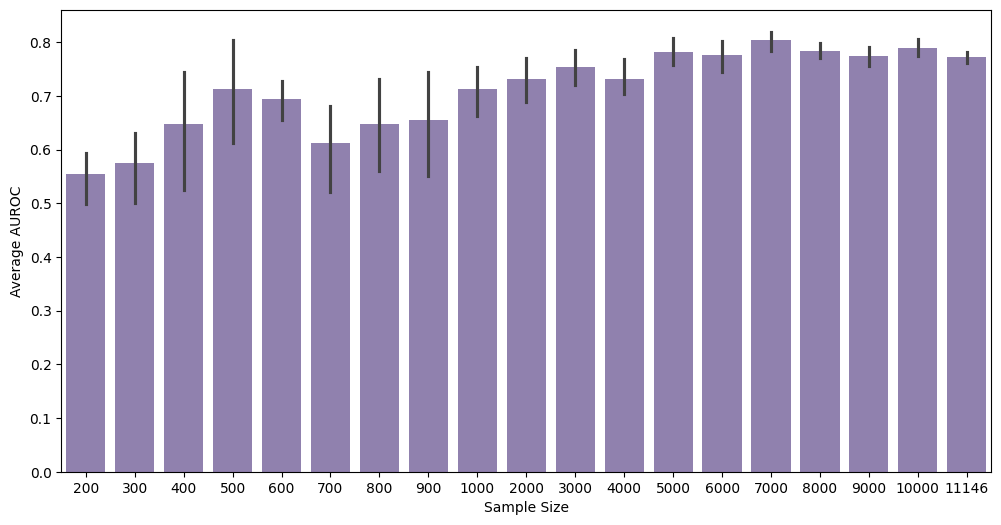

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# import cmocean


plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=linePlotDf,
    x='Sample Size',
    y='AUROC Score',
    # hue='Data Window',
    # palette=sns.color_palette("cmo.matter", n_colors=20),
    color='#8E7AB5'
    # height=6,
    # aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Sample Size')
ax.set(ylabel='Average AUROC')
plt.show()
